In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Assignments/Expanded_Loan_Dataset.csv')
df.head(5)

ID  Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  \
0  4921   42          16      28     94002       4    1.5          3   
1   801   31           7     173     91040       1    6.0          1   
2  1903   39          14      85     94005       3    1.2          3   
3  4311   65          41     170     94143       4    6.1          2   
4  2520   60          36      10     92121       2    1.0          1   

   Mortgage  PersonalLoan  Securities.Account  CDAccount  Online  CreditCard  \
0        91             0                   0          0       1           1   
1         0             0                   0          0       1           0   
2       107             0                   0          0       1           1   
3         0             1                   0          1       1           1   
4         0             0                   0          0       1           1   

   Loan_Amount  Branch_Code        State Rural_Urban  Gender Marital_Status  
0         1369           80  Maharashtra       Rural  Female        Married  
1         1631           78    Karnataka       Urban    Male         Single  
2         4915           79   Tamil Nadu       Rural    Male        Married  
3          286           76    Karnataka       Urban    Male        Married  
4         2651           62    Karnataka       Urban  Female        Married

In [ ]:
df.tail(5)

ID  Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  \
14995  4146   58          34      63     94305       4    1.6          2   
14996   582   28           3      55     94521       4    2.2          1   
14997  3577   56          30      70     90245       3    0.3          2   
14998   302   65          39     150     92120       2    6.9          1   
14999  4318   58          33      60     92672       4    1.3          3   

       Mortgage  PersonalLoan  Securities.Account  CDAccount  Online  \
14995         0             0                   0          0       0   
14996         0             0                   0          0       1   
14997         0             0                   0          0       0   
14998       196             0                   0          0       0   
14999         0             0                   0          0       1   

       CreditCard  Loan_Amount  Branch_Code       State Rural_Urban  Gender  \
14995           0         9231           66  Tamil Nadu       Urban    Male   
14996           1         9535           19     Gujarat       Rural    Male   
14997           0         1251           32  Tamil Nadu       Urban  Female   
14998           0         1160           25   Karnataka       Rural  Female   
14999           0         5174           92     Gujarat       Urban    Male   

      Marital_Status  
14995        Married  
14996        Married  
14997        Married  
14998        Married  
14999         Single

In [ ]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.duplicated().sum())

(15000, 20)
Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'Securities.Account',
       'CDAccount', 'Online', 'CreditCard', 'Loan_Amount', 'Branch_Code',
       'State', 'Rural_Urban', 'Gender', 'Marital_Status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  15000 non-null  int64  
 1   Age                 15000 non-null  int64  
 2   Experience          15000 non-null  int64  
 3   Income              15000 non-null  int64  
 4   ZIP_Code            15000 non-null  int64  
 5   Family              15000 non-null  int64  
 6   CCAvg               15000 non-null  float64
 7   Education           15000 non-null  int64  
 8   Mortgage            15000 non-null  int64  
 9   PersonalLoan        15000 non-null

# Analyzing Customer Base and conversion rate

In [ ]:
# OR: Replace with absolute value
df['Experience'] = df['Experience'].abs()
df.describe()

ID           Age    Experience       Income      ZIP_Code  \
count  15000.000000  15000.000000  15000.000000  15000.00000  15000.000000   
mean    2500.500000     45.338400     20.134600     73.77420  93152.503000   
std     1443.423759     11.462401     11.414428     46.03066   2121.710726   
min        1.000000     23.000000      0.000000      8.00000   9307.000000   
25%     1250.750000     35.000000     10.000000     39.00000  91911.000000   
50%     2500.500000     45.000000     20.000000     64.00000  93437.000000   
75%     3750.250000     55.000000     30.000000     98.00000  94608.000000   
max     5000.000000     67.000000     43.000000    224.00000  96651.000000   

             Family         CCAvg     Education      Mortgage  PersonalLoan  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean       2.396400      1.937913      1.881000     56.498800      0.096000   
std        1.147587      1.747550      0.839813    101.707021      0.294601   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        1.000000      0.700000      1.000000      0.000000      0.000000   
50%        2.000000      1.500000      2.000000      0.000000      0.000000   
75%        3.000000      2.500000      3.000000    101.000000      0.000000   
max        4.000000     10.000000      3.000000    635.000000      1.000000   

       Securities.Account     CDAccount        Online    CreditCard  \
count        15000.000000  15000.000000  15000.000000  15000.000000   
mean             0.104400      0.060400      0.596800      0.294000   
std              0.305789      0.238234      0.490557      0.455607   
min              0.000000      0.000000      0.000000      0.000000   
25%              0.000000      0.000000      0.000000      0.000000   
50%              0.000000      0.000000      1.000000      0.000000   
75%              0.000000      0.000000      1.000000      1.000000   
max              1.000000      1.000000      1.000000      1.000000   

        Loan_Amount   Branch_Code  
count  15000.000000  15000.000000  
mean    5025.972600     50.338200  
std     2837.935415     28.455393  
min      101.000000      1.000000  
25%     2571.250000     25.750000  
50%     5040.500000     51.000000  
75%     7427.500000     75.000000  
max     9997.000000     99.000000

In [ ]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the mode for numeric columns
for col in numeric_columns:
    print(f"Mode of {col}: {df[col].mode()[0]}")

Mode of ID: 1
Mode of Age: 35
Mode of Experience: 32
Mode of Income: 44
Mode of ZIP_Code: 94720
Mode of Family: 1
Mode of CCAvg: 0.3
Mode of Education: 1
Mode of Mortgage: 0
Mode of PersonalLoan: 0
Mode of Securities.Account: 0
Mode of CDAccount: 0
Mode of Online: 1
Mode of CreditCard: 0
Mode of Loan_Amount: 3172
Mode of Branch_Code: 26


In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
numeric_columns.var()

ID                    2.083472e+06
Age                   1.313866e+02
Experience            1.314964e+02
Income                2.118822e+03
ZIP_Code              4.501656e+06
Family                1.316955e+00
CCAvg                 3.053930e+00
Education             7.052860e-01
Mortgage              1.034432e+04
PersonalLoan          8.678979e-02
Securities.Account    9.350687e-02
CDAccount             5.675562e-02
Online                2.406458e-01
CreditCard            2.075778e-01
Loan_Amount           8.053877e+06
Branch_Code           8.097094e+02
dtype: float64

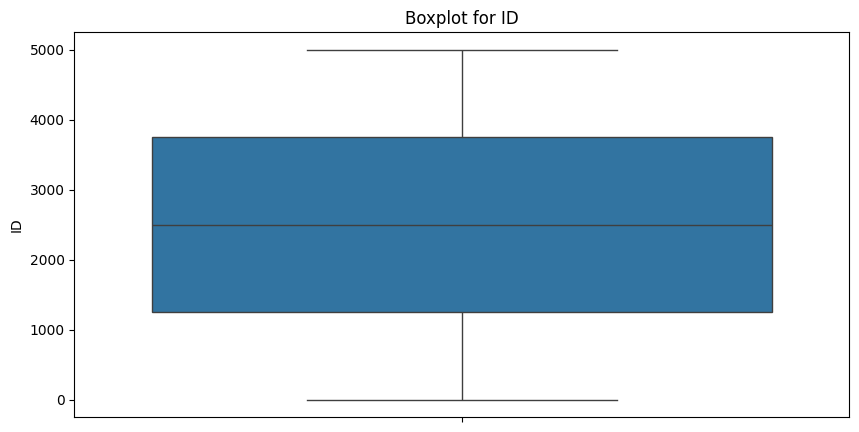

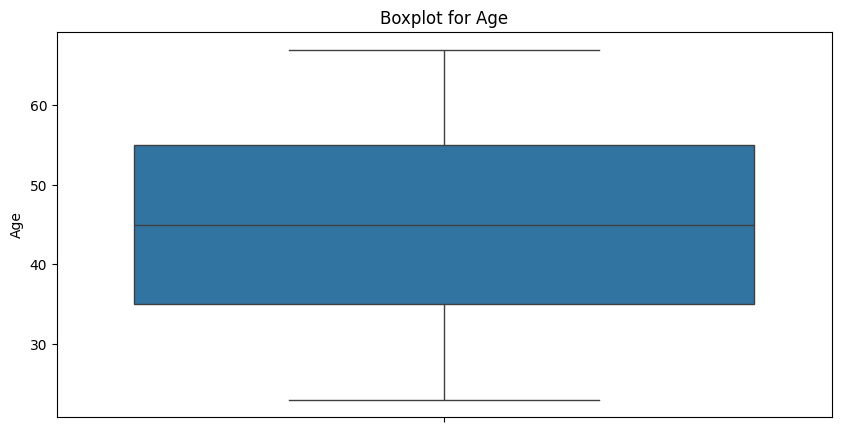

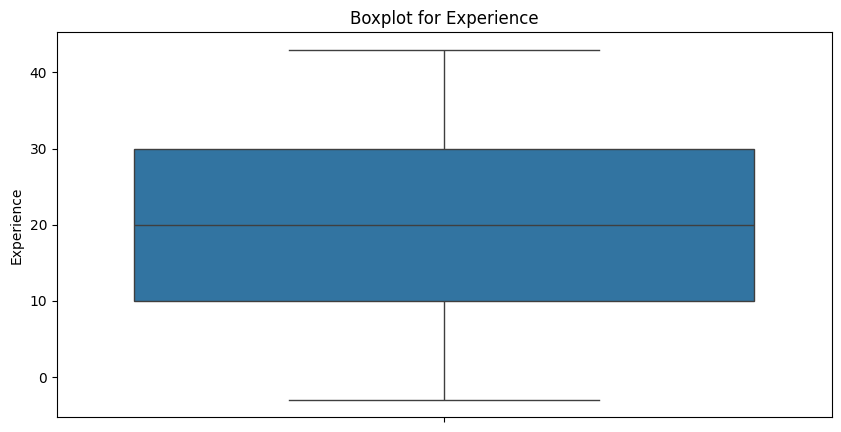

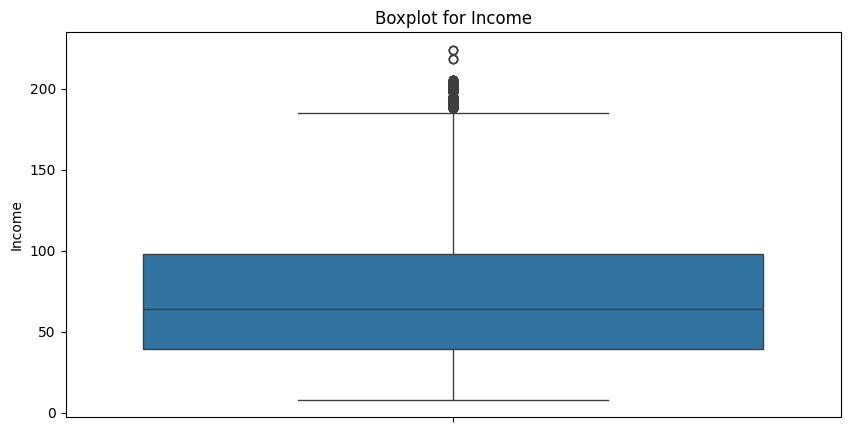

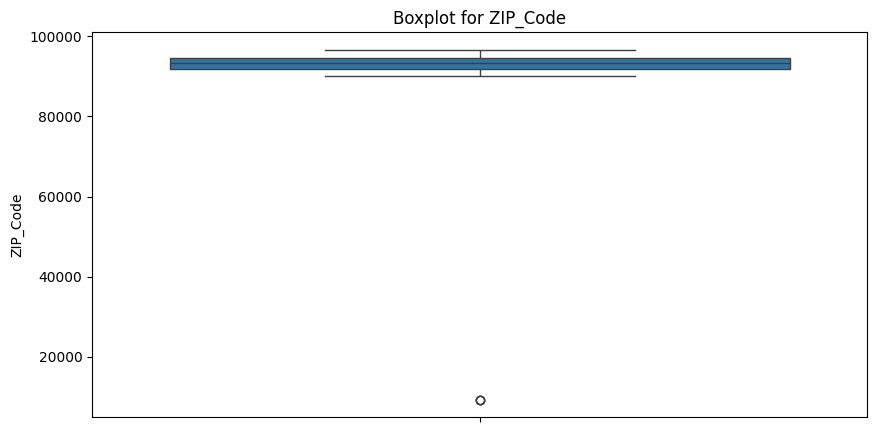

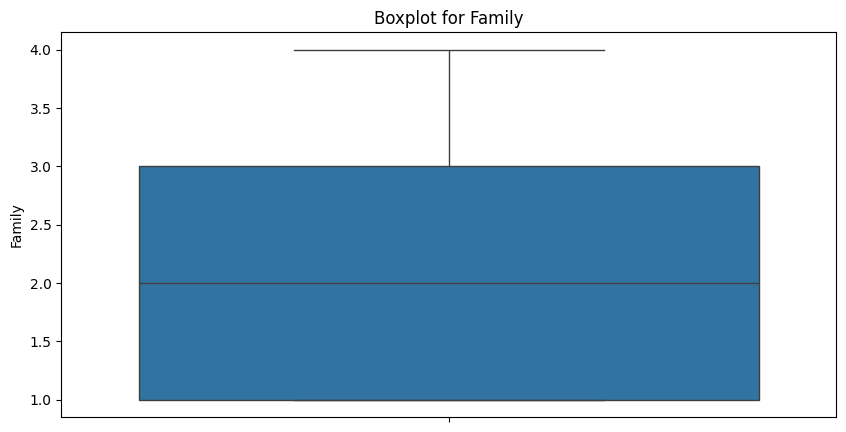

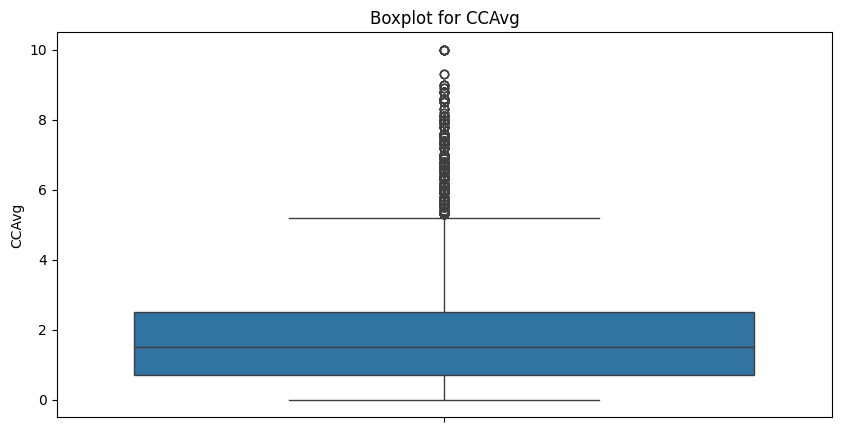

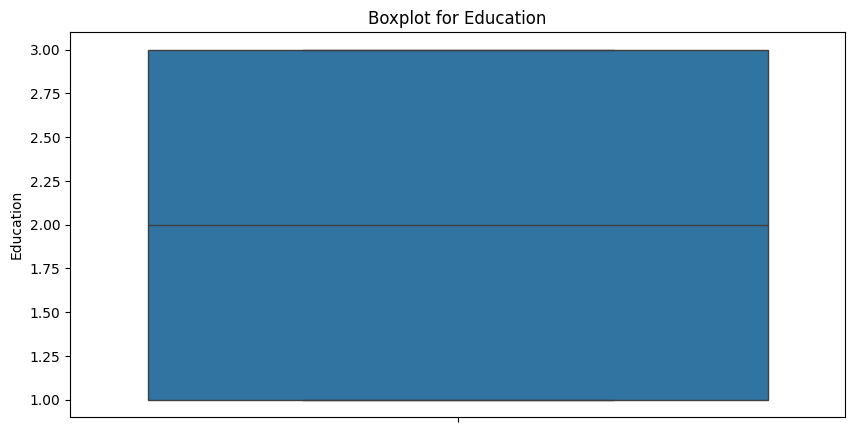

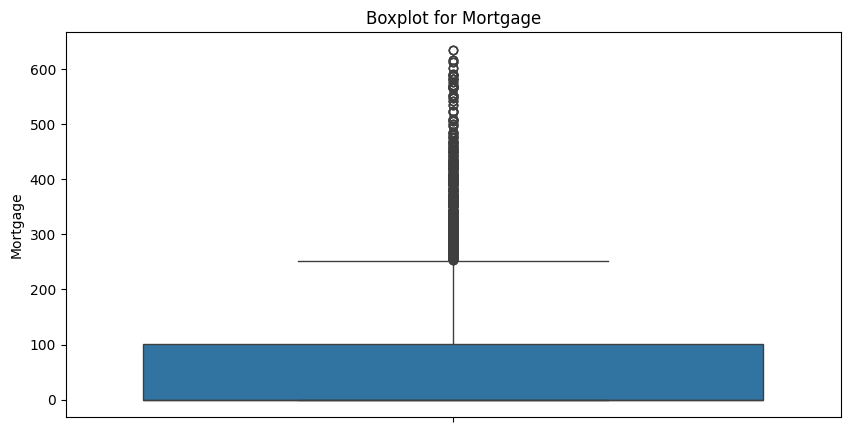

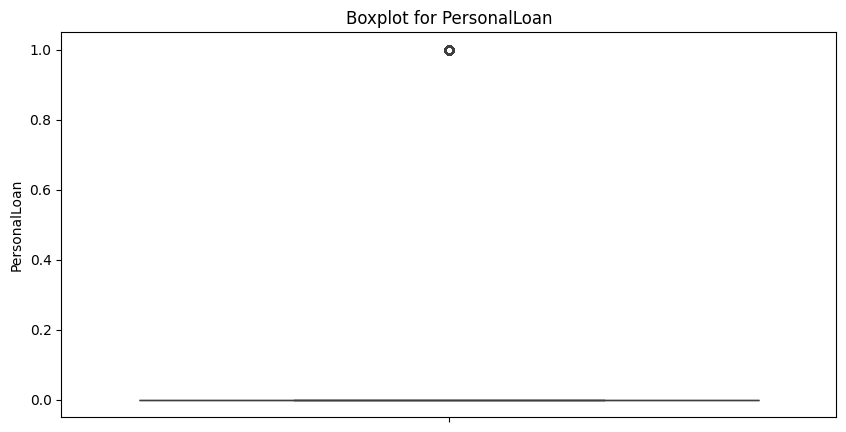

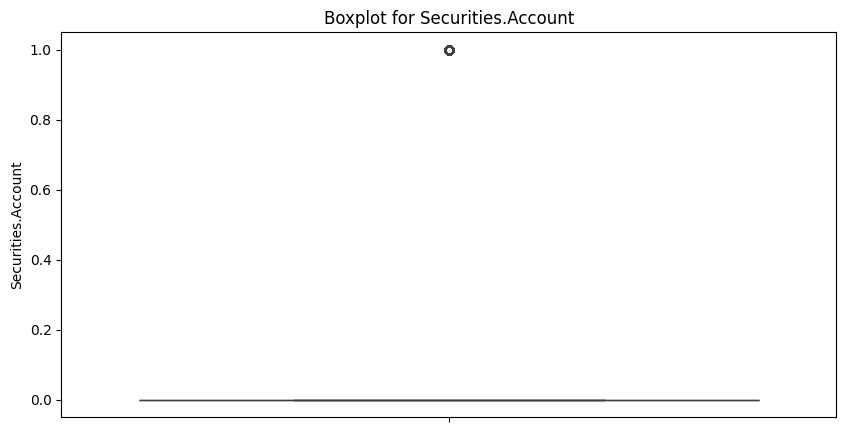

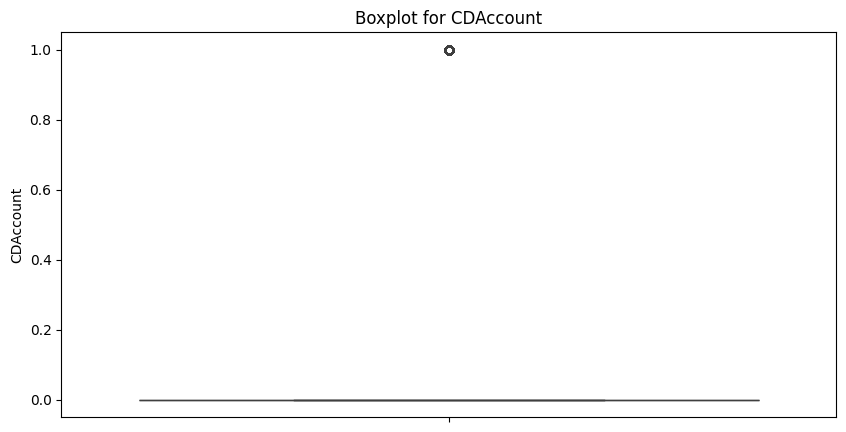

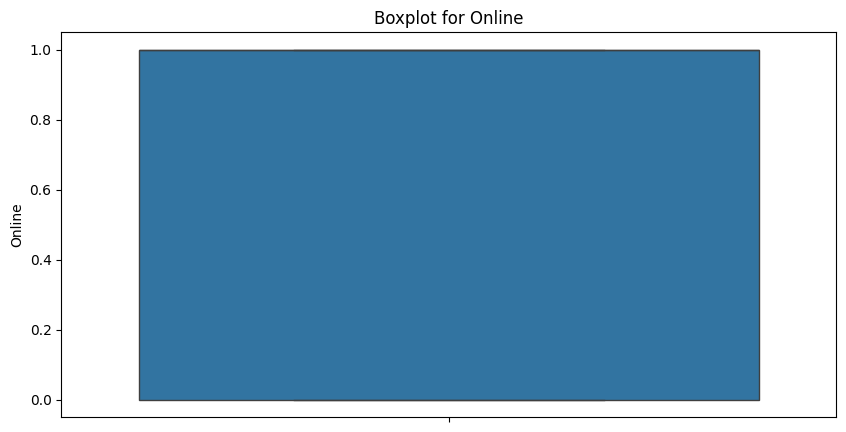

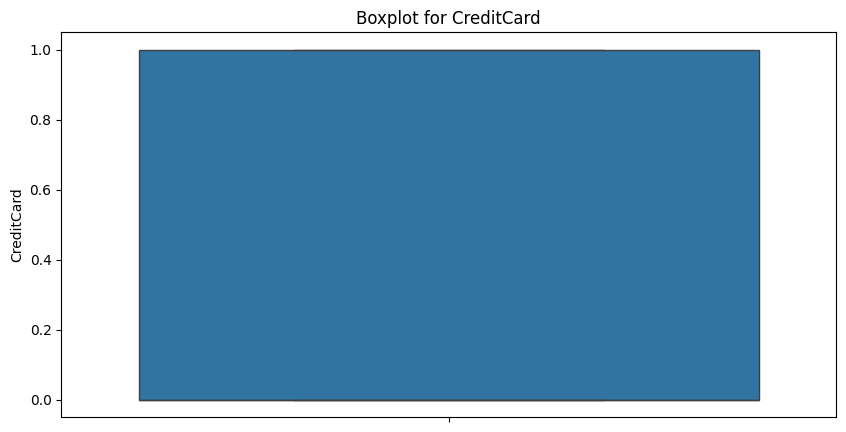

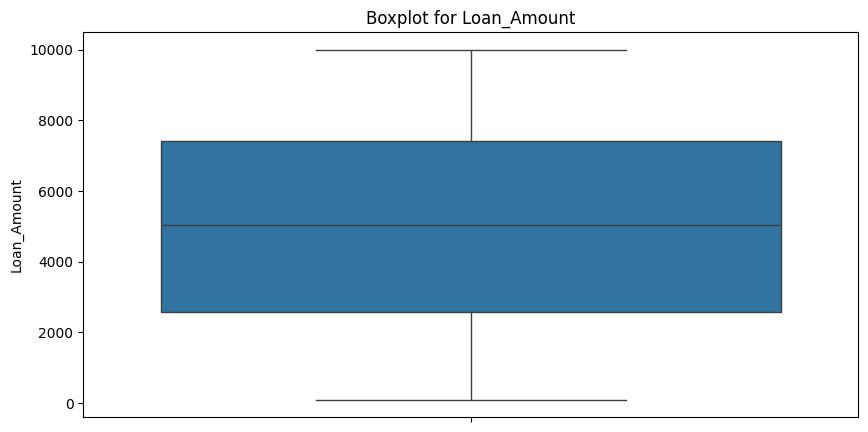

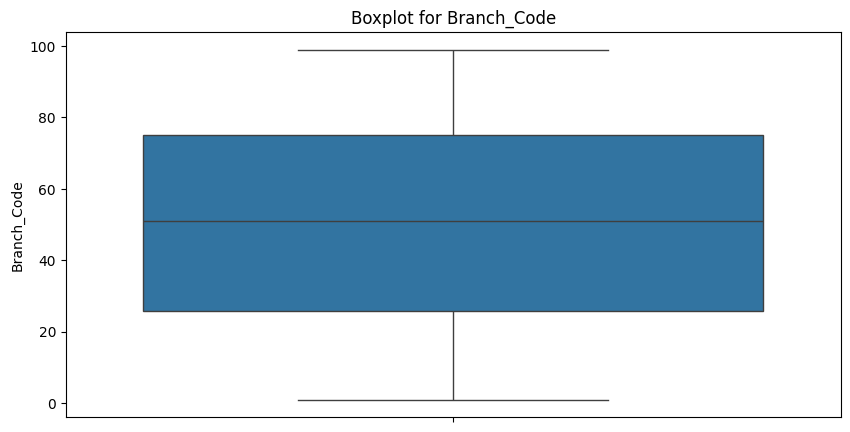

In [ ]:
# Box plots for detecting outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

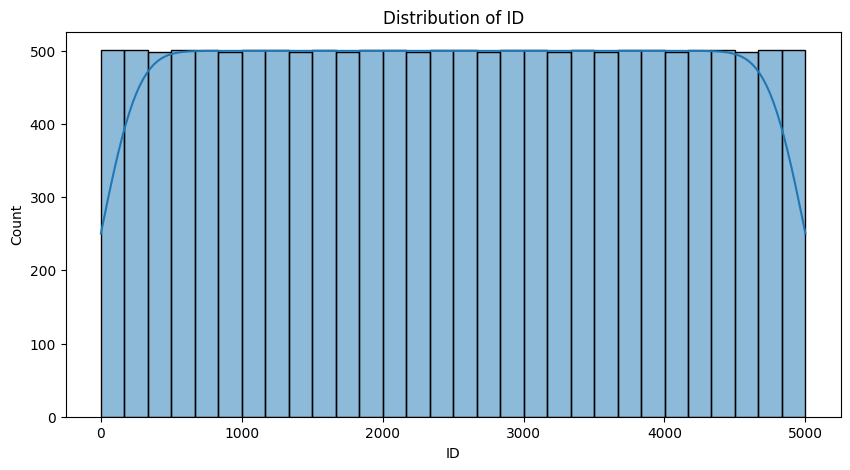

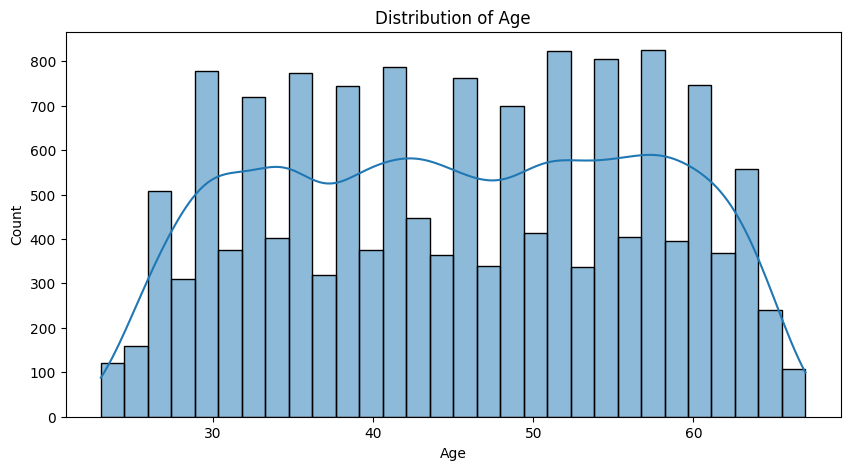

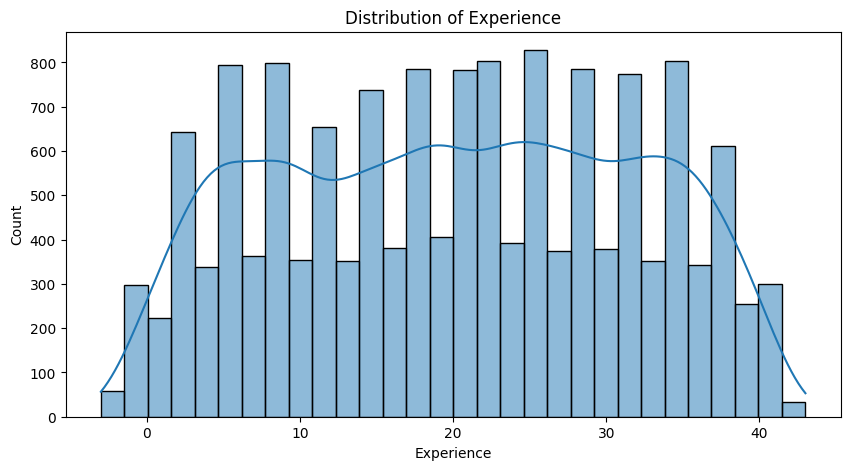

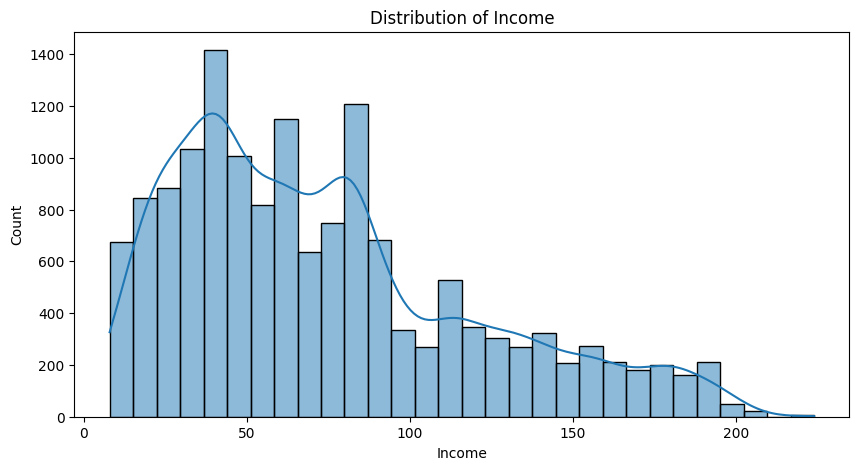

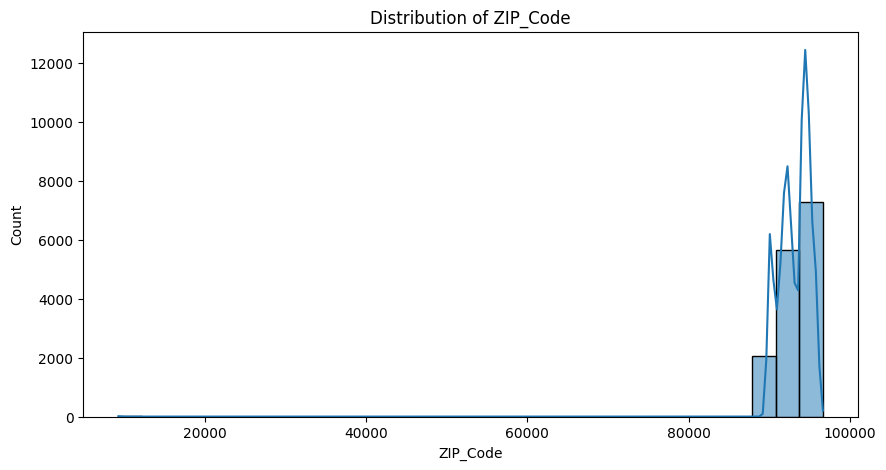

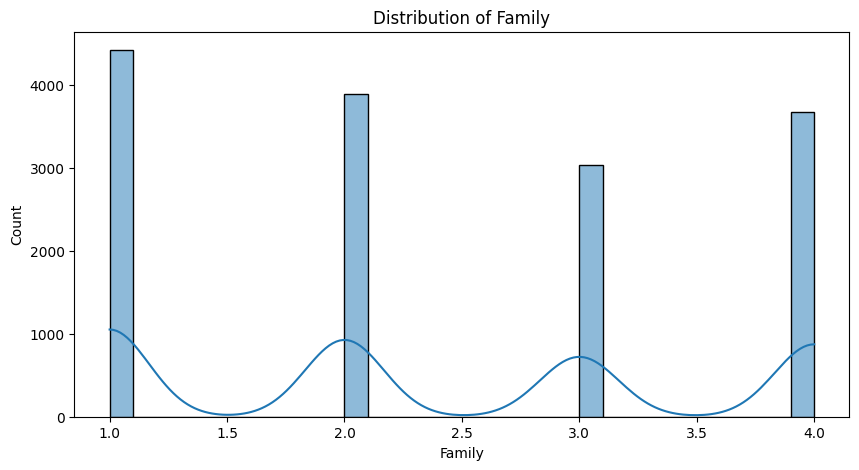

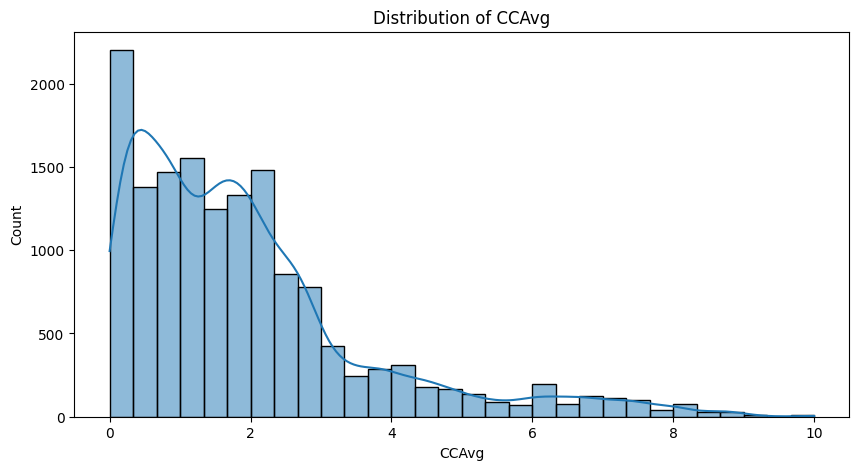

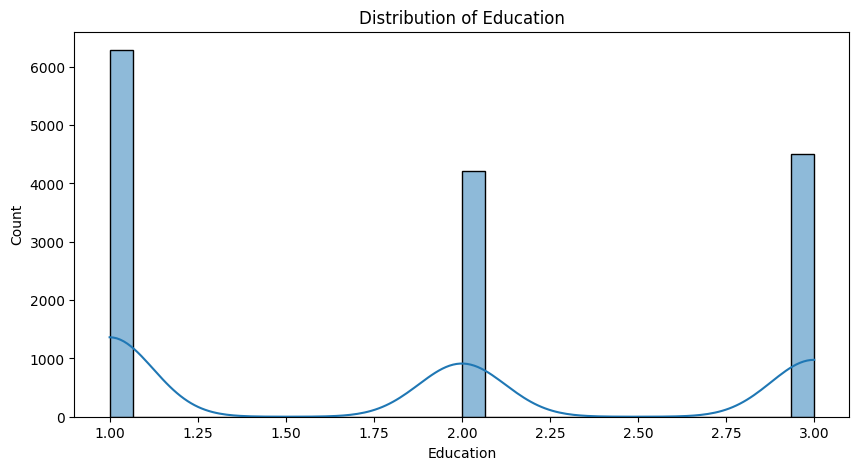

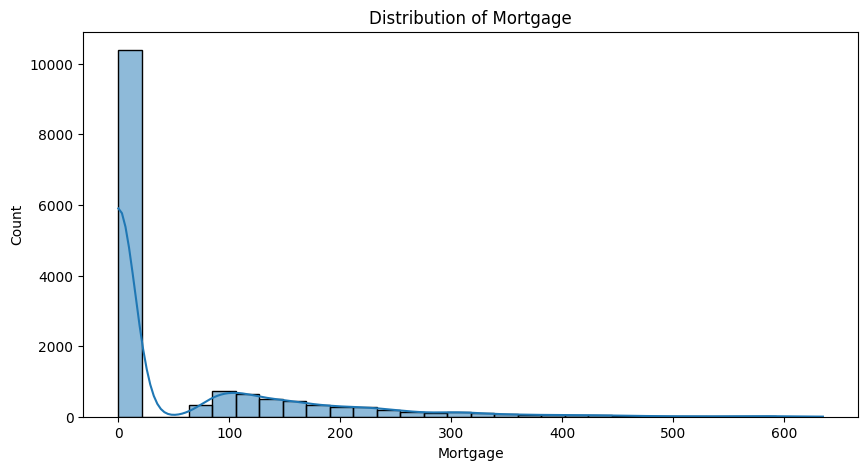

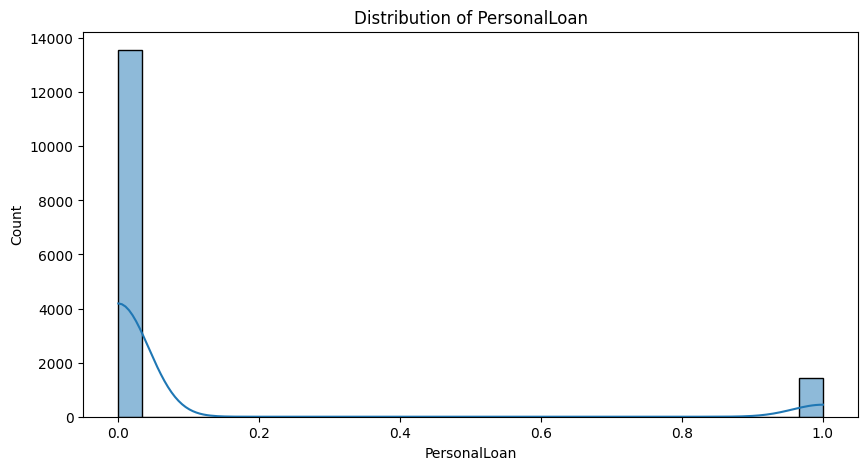

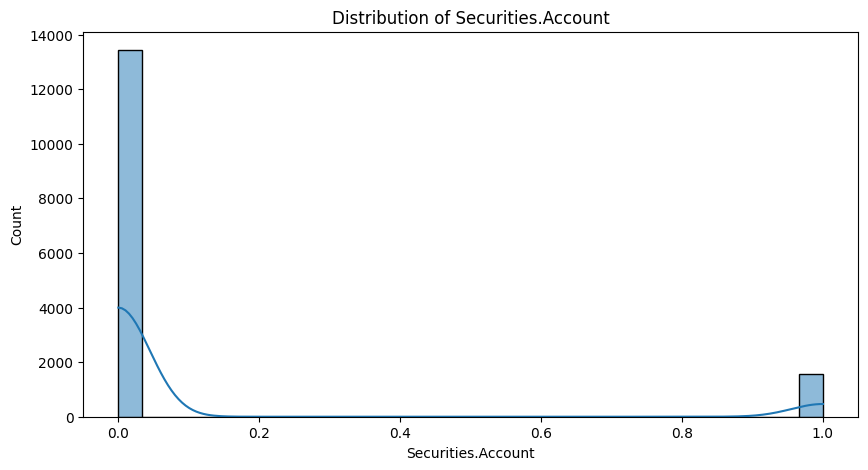

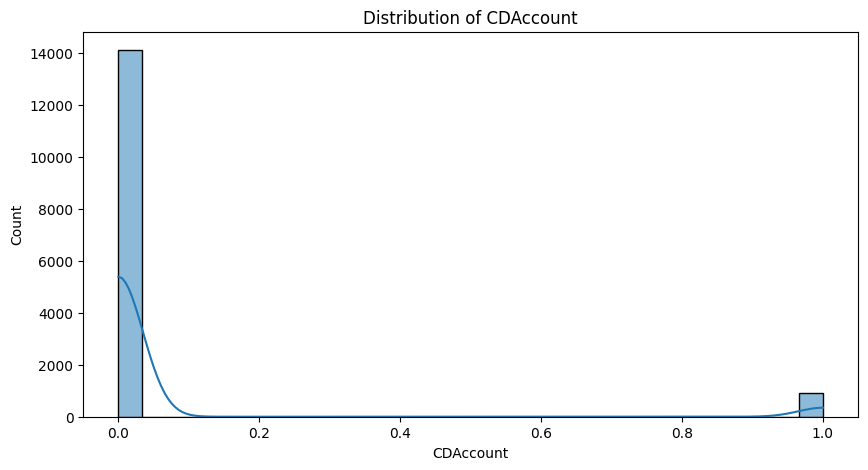

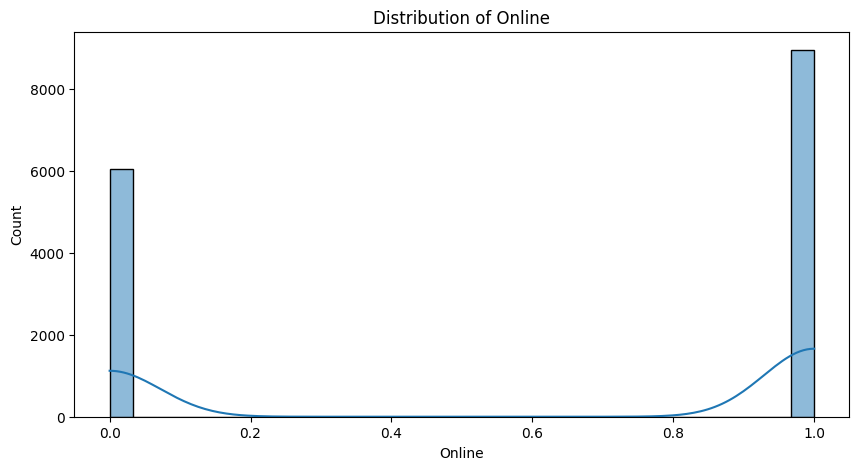

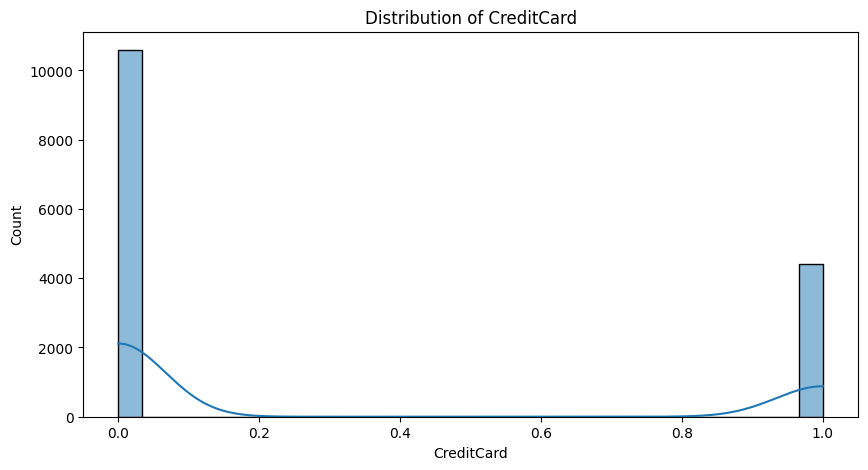

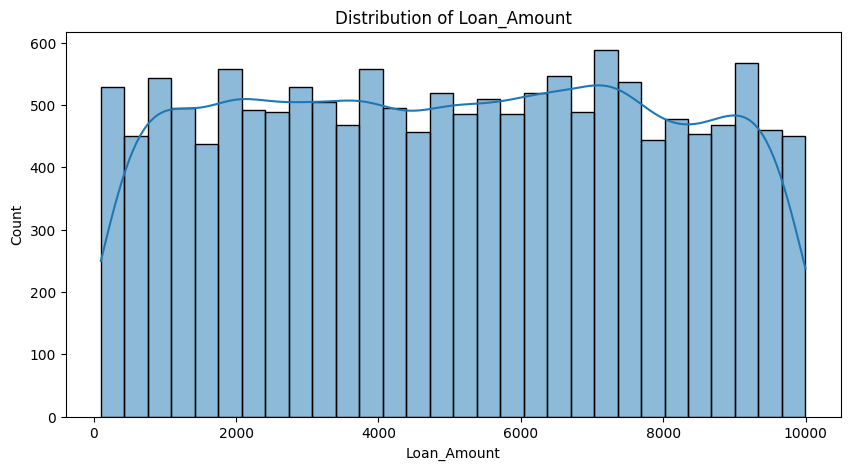

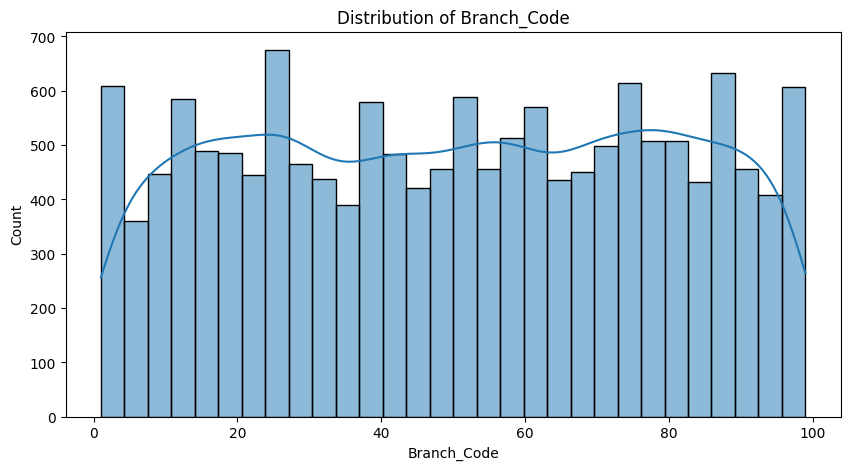

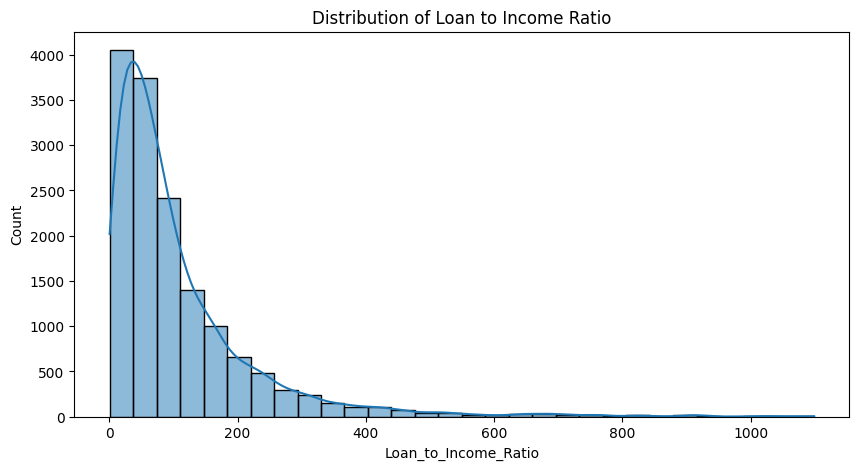

In [ ]:
# Numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting distributions
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)  # Bins are set to 30 for better resolution
    plt.title(f'Distribution of {col}')
    plt.show()

df['Loan_to_Income_Ratio'] = df['Loan_Amount'] / (df['Income'] + 1)  # Adding 1 to avoid division by zero
plt.figure(figsize=(10, 5))
sns.histplot(df['Loan_to_Income_Ratio'], kde=True, bins=30)
plt.title('Distribution of Loan to Income Ratio')
plt.show()

State unique values:
 State
Gujarat        3114
Tamil Nadu     3030
Karnataka      3006
Maharashtra    2934
Delhi          2916
Name: count, dtype: int64 

Rural_Urban unique values:
 Rural_Urban
Urban    7506
Rural    7494
Name: count, dtype: int64 

Gender unique values:
 Gender
Female    7530
Male      7470
Name: count, dtype: int64 

Marital_Status unique values:
 Marital_Status
Married    7572
Single     7428
Name: count, dtype: int64 



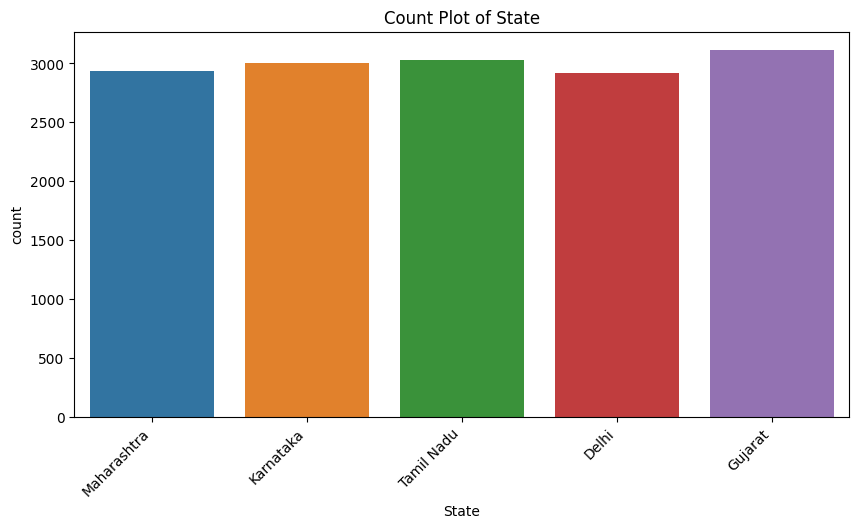

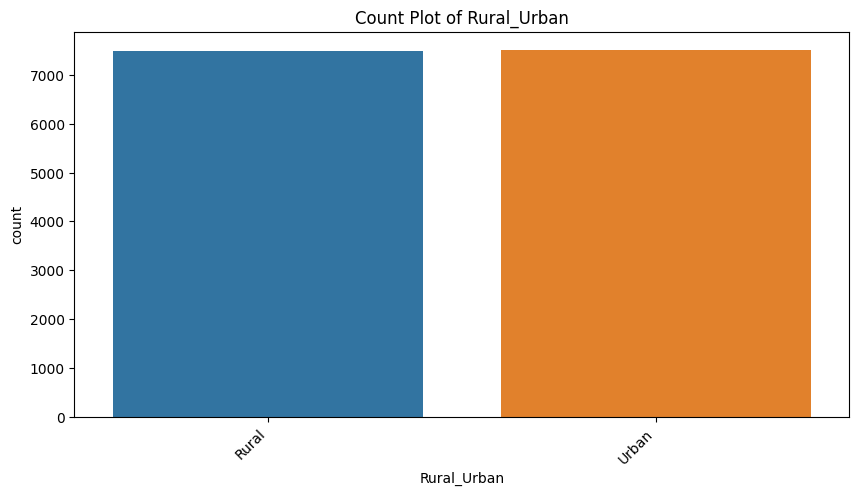

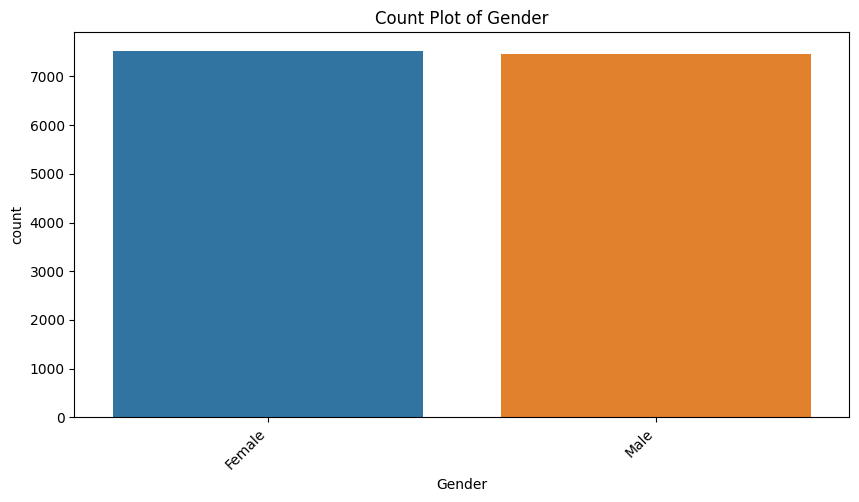

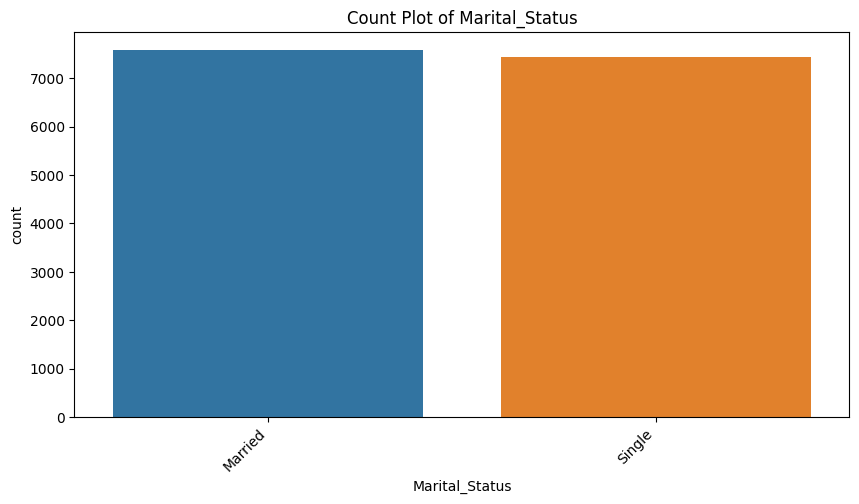

In [ ]:
# Categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Checking unique values in categorical columns
for col in categorical_columns:
    print(f"{col} unique values:\n", df[col].value_counts(), "\n")

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, hue=col, dodge=False, legend=False)  # Set hue to x and disable legend
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

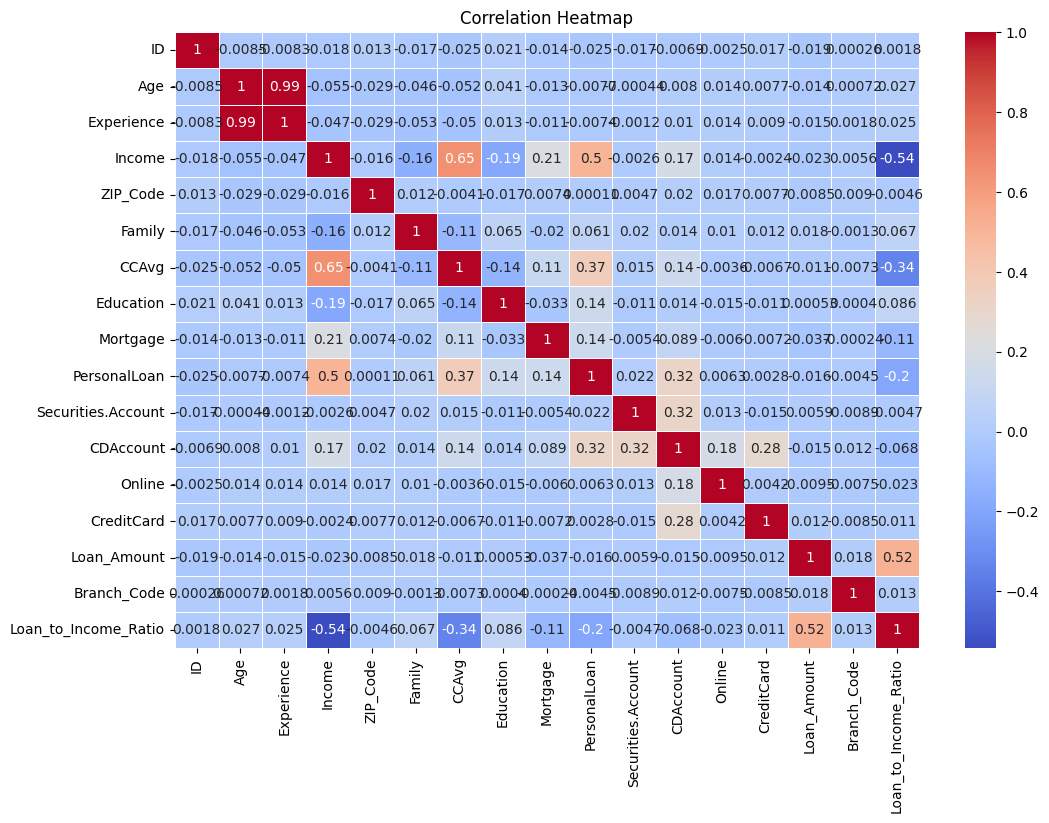

In [ ]:
# Correlation matrix and heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Converted Customers:
                 ID          Age   Experience       Income      ZIP_Code  \
count  1440.000000  1440.000000  1440.000000  1440.000000   1440.000000   
mean   2390.650000    45.066667    19.843750   144.745833  93153.202083   
std    1393.424335    11.582907    11.574391    31.562473   1758.000795   
min      10.000000    26.000000     0.000000    60.000000  90016.000000   
25%    1166.500000    35.000000     9.000000   122.000000  91908.750000   
50%    2342.000000    45.000000    20.000000   142.500000  93407.000000   
75%    3566.000000    55.000000    30.000000   172.000000  94705.500000   
max    4981.000000    65.000000    41.000000   203.000000  96008.000000   

            Family        CCAvg    Education     Mortgage  PersonalLoan  \
count  1440.000000  1440.000000  1440.000000  1440.000000        1440.0   
mean      2.612500     3.905347     2.233333   100.845833           1.0   
std       1.114618     2.096220     0.752850   160.736045           0.0   
mi

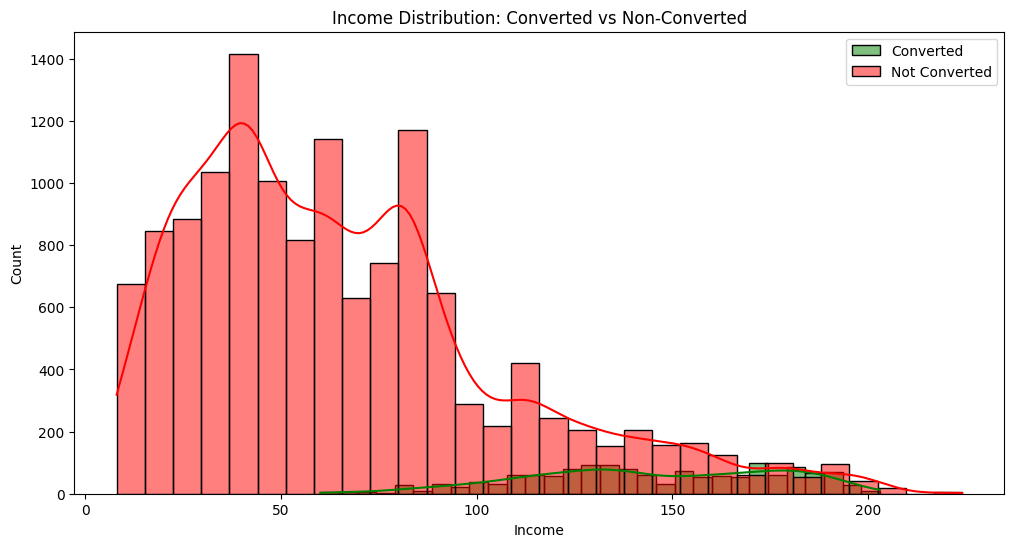

In [ ]:
# Descriptive statistics for converters
converted_customers = df[df['PersonalLoan'] == 1]
non_converted_customers = df[df['PersonalLoan'] == 0]

print("Converted Customers:\n", converted_customers.describe(), "\n")
print("Non-Converted Customers:\n", non_converted_customers.describe())

# Distribution of Income for converted vs. non-converted
plt.figure(figsize=(12, 6))
sns.histplot(data=converted_customers, x='Income', color='green', label='Converted', kde=True, bins=30)
sns.histplot(data=non_converted_customers, x='Income', color='red', label='Not Converted', kde=True, bins=30)
plt.title('Income Distribution: Converted vs Non-Converted')
plt.legend()
plt.show()


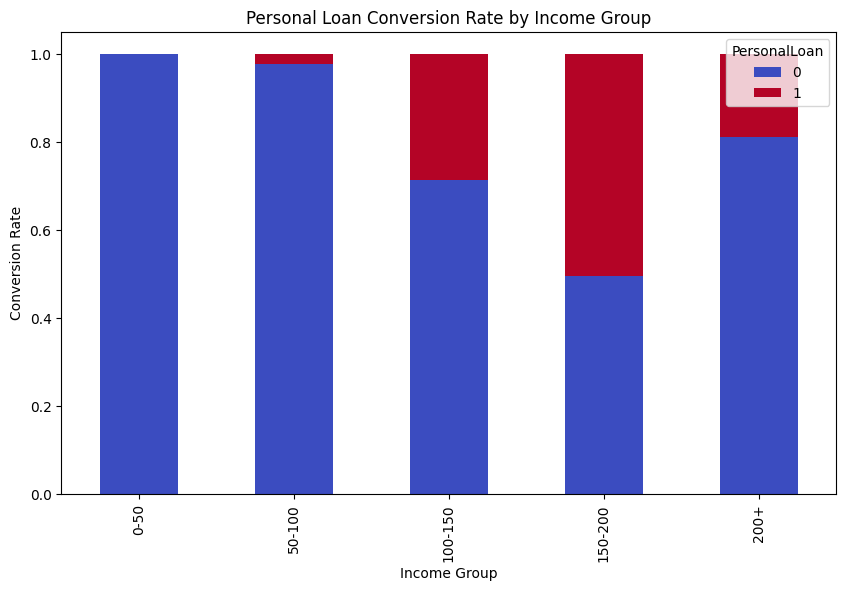

In [ ]:
# Define income bins
income_bins = [0, 50, 100, 150, 200, np.inf]
df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=['0-50', '50-100', '100-150', '150-200', '200+'])

# Conversion rate by income group
conversion_by_income = pd.crosstab(df['Income_Group'], df['PersonalLoan'])
conversion_by_income = conversion_by_income.div(conversion_by_income.sum(1), axis=0)  # Convert to percentage
conversion_by_income.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='coolwarm')
plt.title('Personal Loan Conversion Rate by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Conversion Rate')
plt.show()


# Customer Behaviour

In [ ]:
unique_incomes = df['Income'].unique()
sorted_unique_incomes = np.sort(unique_incomes)
print(sorted_unique_incomes)
unique_ages = df['Age'].unique()
sorted_unique_ages = np.sort(unique_ages)
print(sorted_unique_ages)

[  8   9  10  11  12  13  14  15  18  19  20  21  22  23  24  25  28  29
  30  31  32  33  34  35  38  39  40  41  42  43  44  45  48  49  50  51
  52  53  54  55  58  59  60  61  62  63  64  65  68  69  70  71  72  73
  74  75  78  79  80  81  82  83  84  85  88  89  90  91  92  93  94  95
  98  99 100 101 102 103 104 105 108 109 110 111 112 113 114 115 118 119
 120 121 122 123 124 125 128 129 130 131 132 133 134 135 138 139 140 141
 142 143 144 145 148 149 150 151 152 153 154 155 158 159 160 161 162 163
 164 165 168 169 170 171 172 173 174 175 178 179 180 181 182 183 184 185
 188 189 190 191 192 193 194 195 198 199 200 201 202 203 204 205 218 224]
[23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]


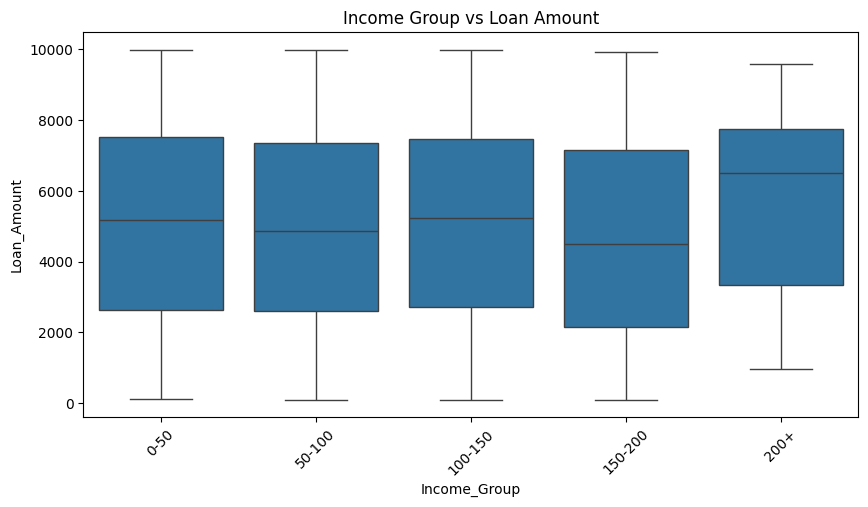

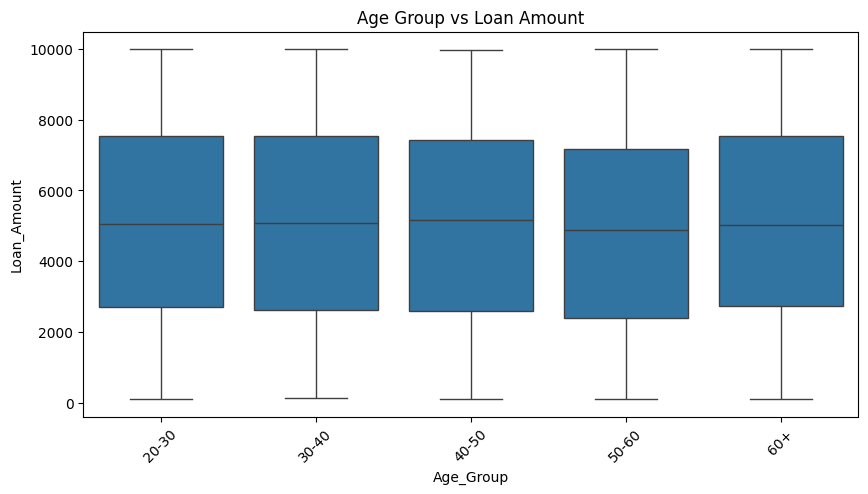

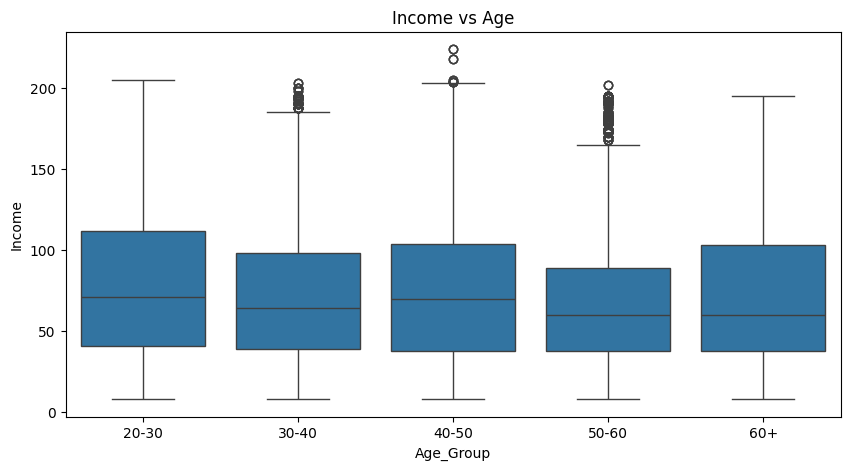

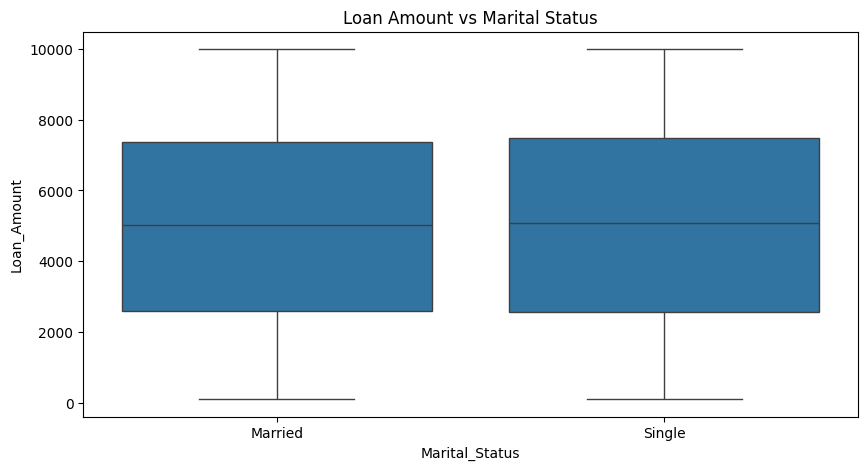

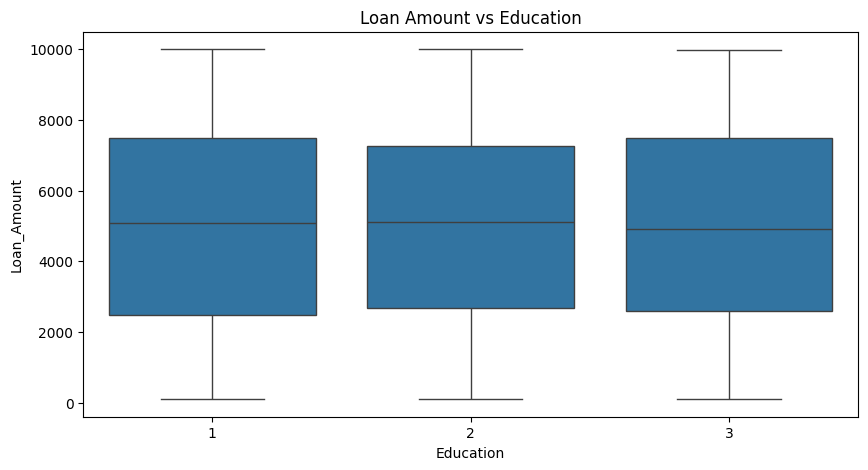

In [ ]:
income_bins = [0, 50, 100, 150, 200, np.inf]
df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=['0-50', '50-100', '100-150', '150-200', '200+'])
plt.figure(figsize=(10, 5))
sns.boxplot(x='Income_Group', y='Loan_Amount', data=df)
plt.title('Income Group vs Loan Amount')
plt.xticks(rotation=45)
plt.show()

# Define income bins based on your data distribution
age_bins = [20, 30, 40, 50, 60, np.inf]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=['20-30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize=(10, 5))
sns.boxplot(x='Age_Group', y='Loan_Amount', data=df)
plt.title('Age Group vs Loan Amount')
plt.xticks(rotation=45)
plt.show()

age_bins = [20, 30, 40, 50, 60, np.inf]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=['20-30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize=(10, 5))
sns.boxplot(x='Age_Group', y='Income', data=df)
plt.title('Income vs Age')
plt.show()


plt.figure(figsize=(10, 5))
sns.boxplot(x='Marital_Status', y='Loan_Amount', data=df)
plt.title('Loan Amount vs Marital Status')
plt.show()


plt.figure(figsize=(10, 5))
sns.boxplot(x='Education', y='Loan_Amount', data=df)
plt.title('Loan Amount vs Education')
plt.show()



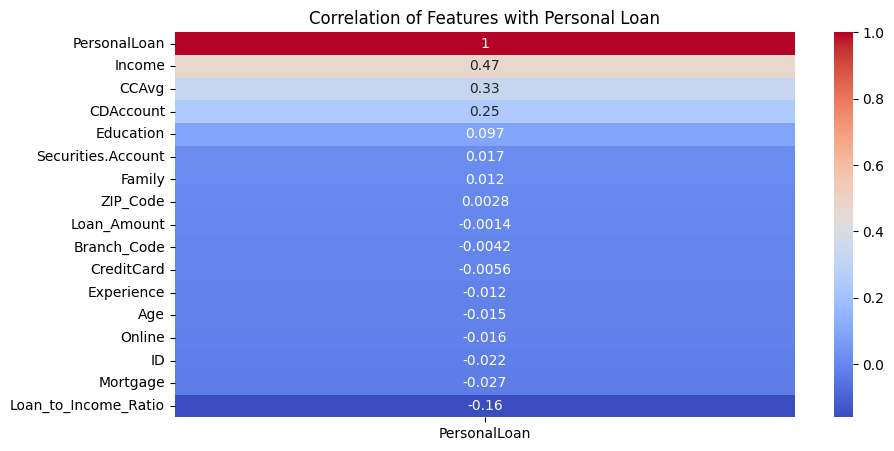

In [ ]:
# Identifying numerical columns (excluding categorical features)
numerical_columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Loan_Amount']

# Handling outliers using IQR (Interquartile Range)
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
# Removing outliers
df1 = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Correlation with target variable
plt.figure(figsize=(10, 5))
sns.heatmap(df1.corr(numeric_only=True)[['PersonalLoan']].sort_values(by='PersonalLoan', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Personal Loan')
plt.show()


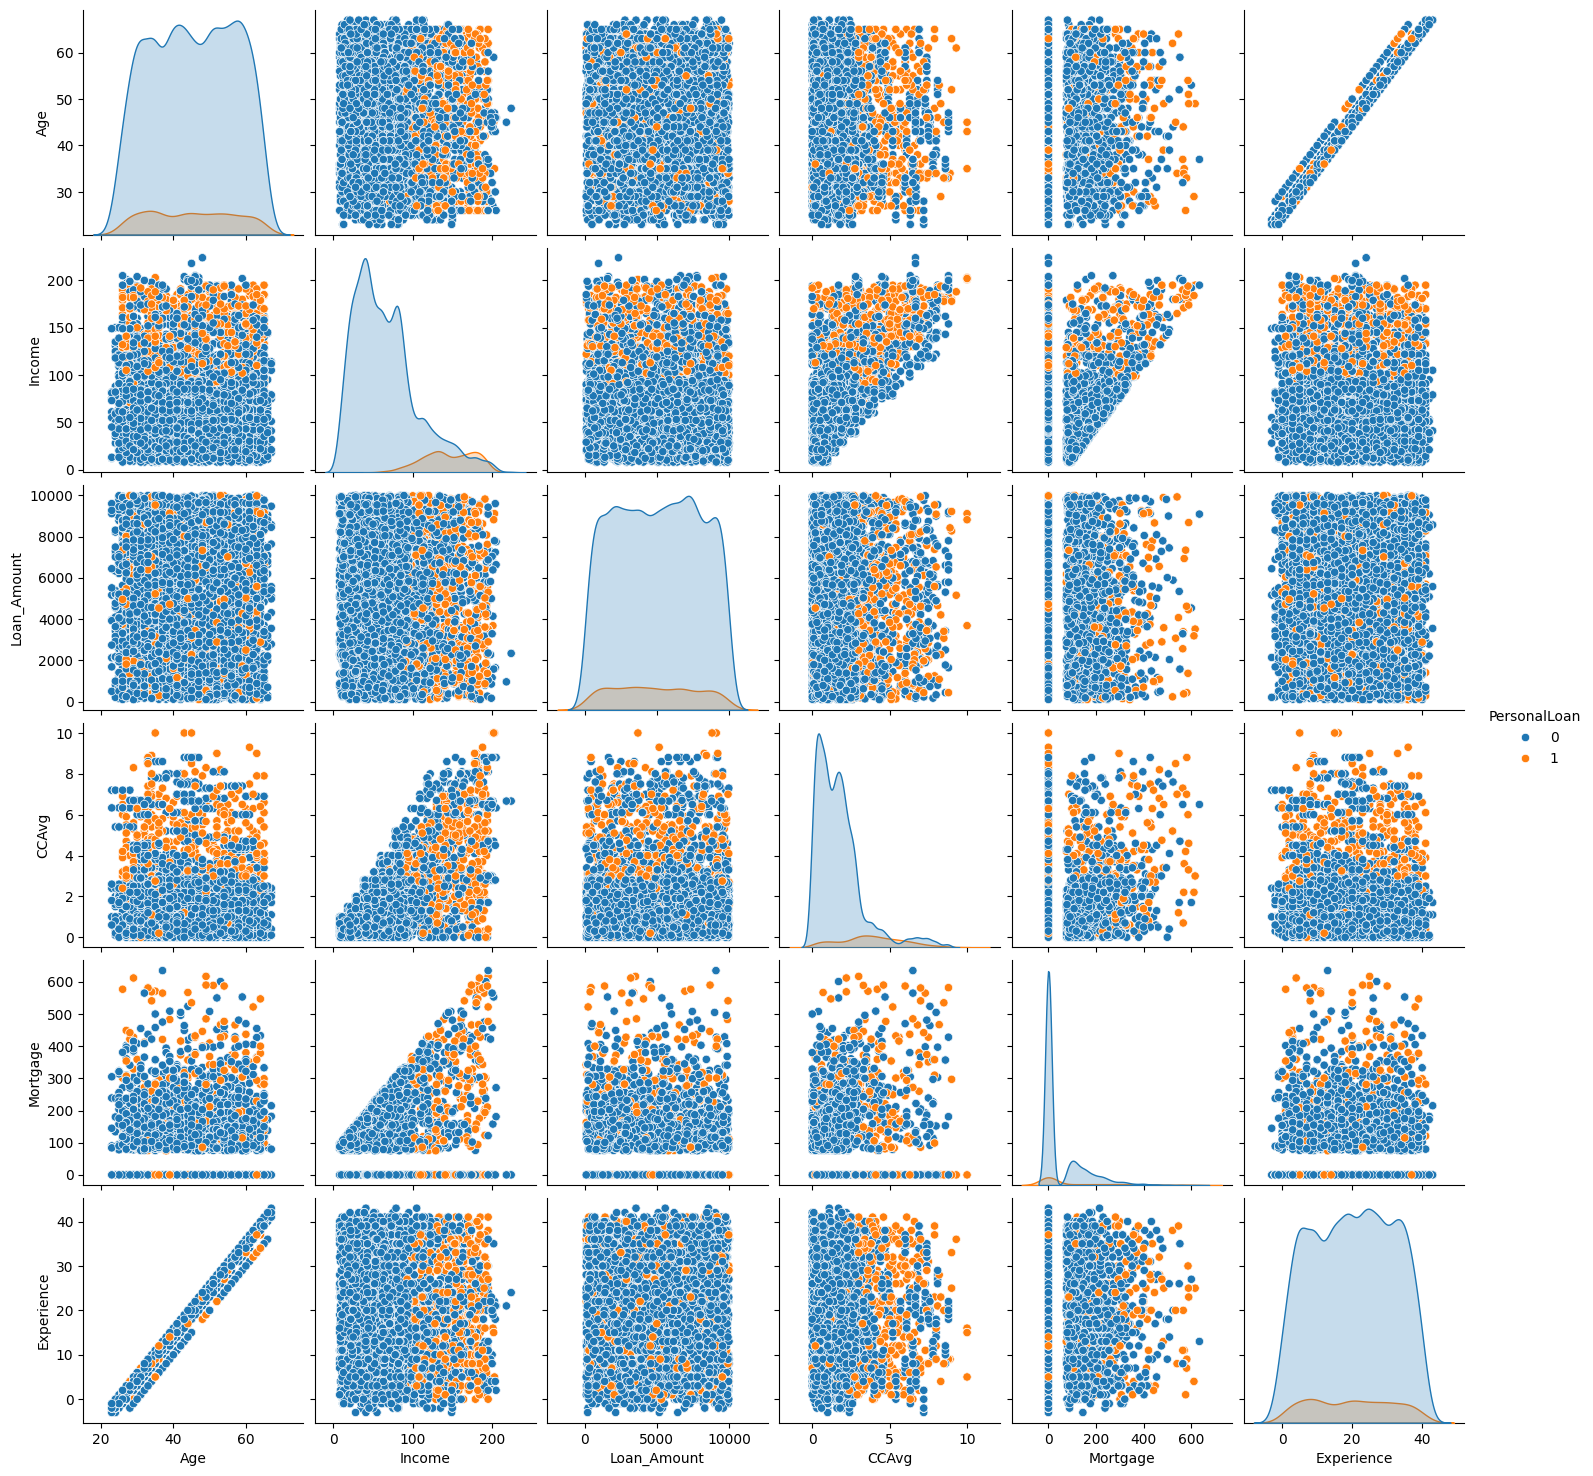

In [ ]:
# Pair plot for features related to personal loan acceptance
sns.pairplot(df, vars=['Age', 'Income', 'Loan_Amount', 'CCAvg', 'Mortgage', 'Experience'], hue='PersonalLoan')
plt.show()


# Finding Cross Selling Opportunity

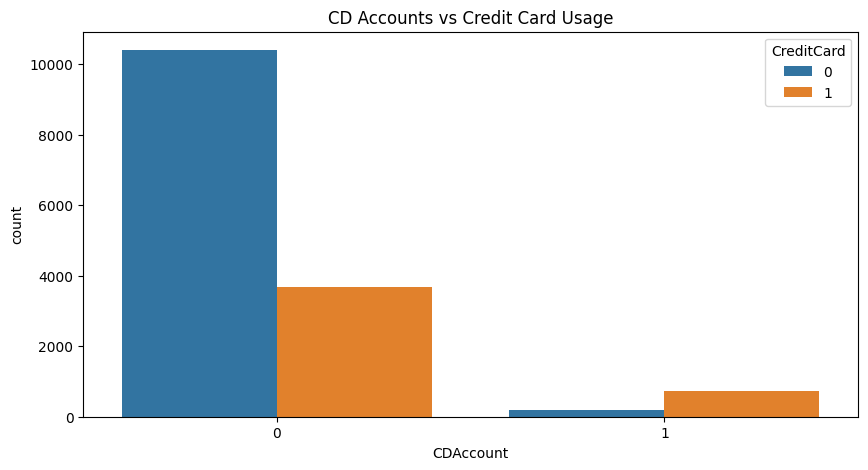

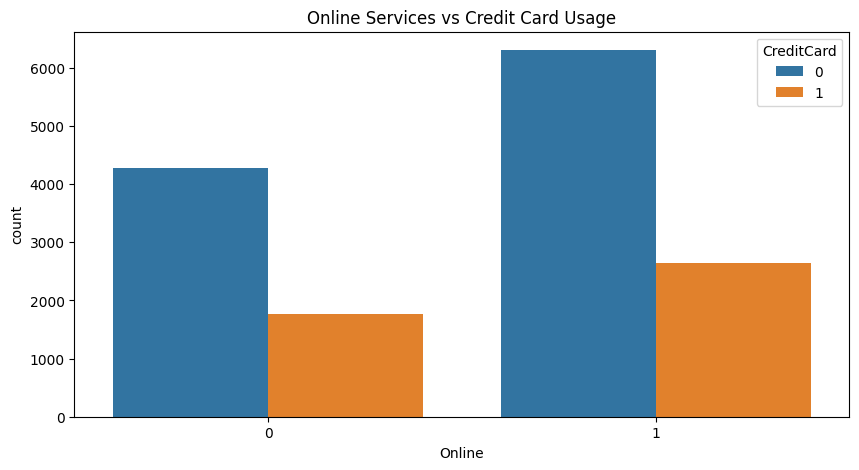

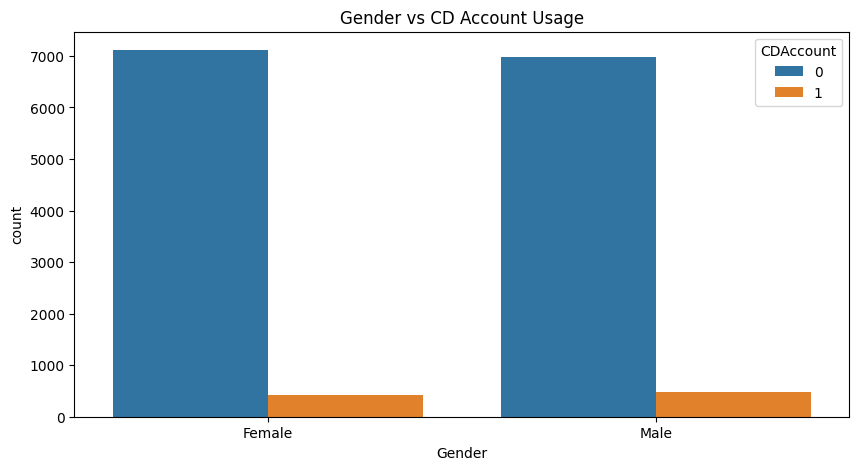

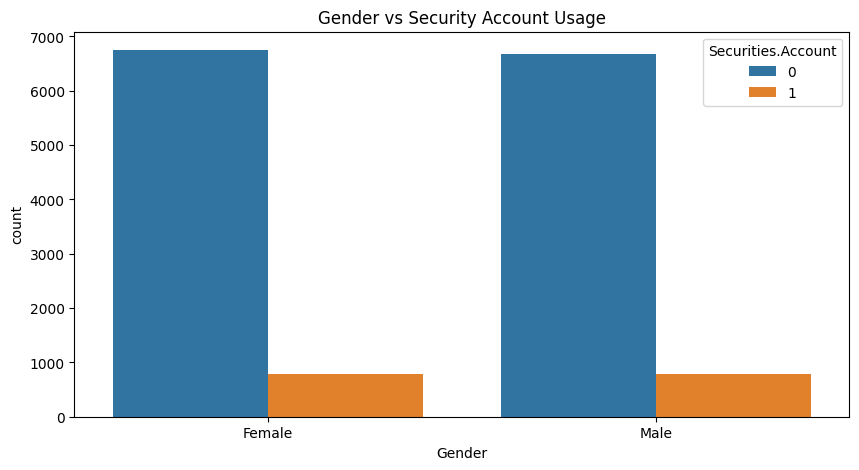

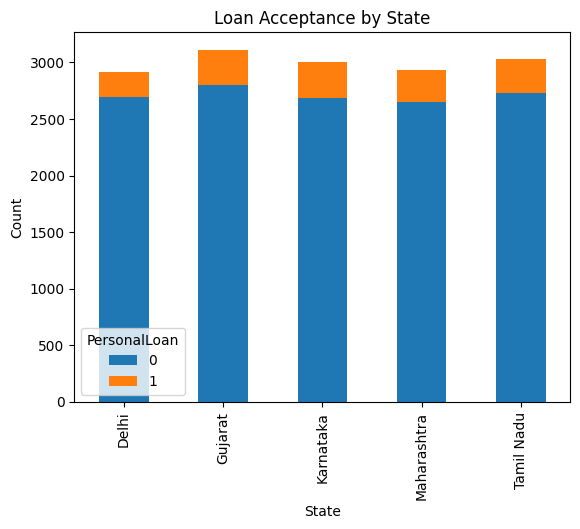

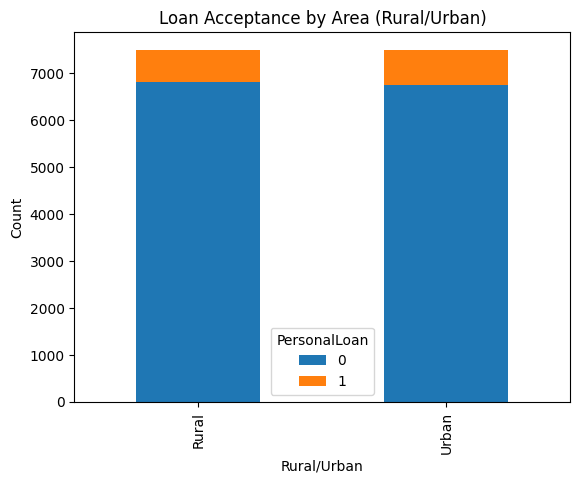

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='CDAccount', hue='CreditCard', data=df)
plt.title('CD Accounts vs Credit Card Usage')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Online', hue='CreditCard', data=df)
plt.title('Online Services vs Credit Card Usage')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', hue='CDAccount', data=df)
plt.title('Gender vs CD Account Usage')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', hue='Securities.Account', data=df)
plt.title('Gender vs Security Account Usage')
plt.show()

loan_by_state = pd.crosstab(df['State'], df['PersonalLoan'])
loan_by_state.plot(kind='bar', stacked=True)
plt.title('Loan Acceptance by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

loan_by_area = pd.crosstab(df['Rural_Urban'], df['PersonalLoan'])
loan_by_area.plot(kind='bar', stacked=True)
plt.title('Loan Acceptance by Area (Rural/Urban)')
plt.xlabel('Rural/Urban')
plt.ylabel('Count')
plt.show()


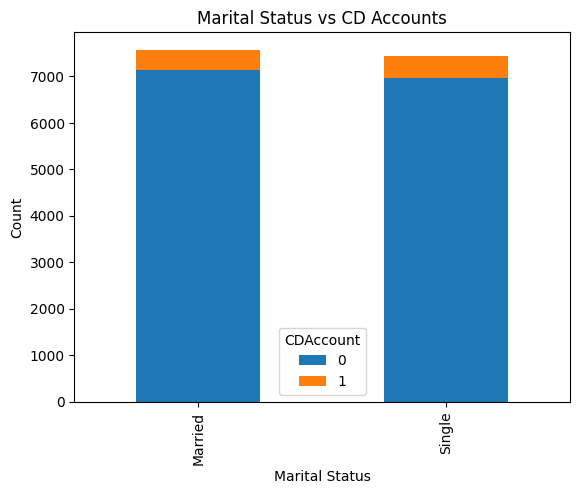

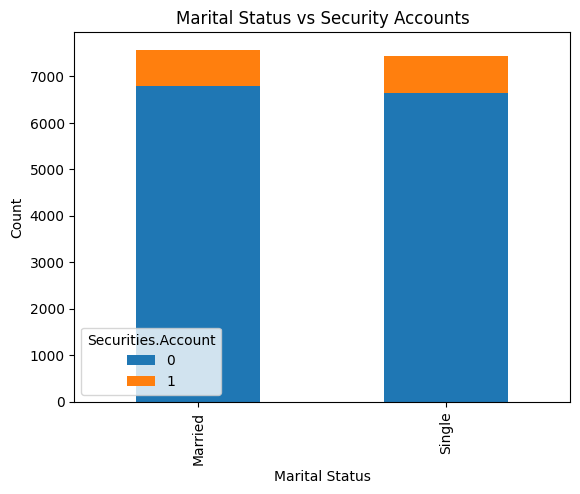

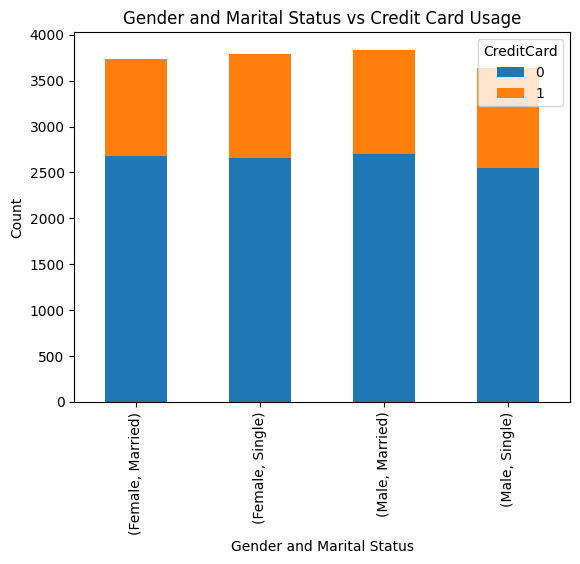

In [ ]:
pd.crosstab(df['Marital_Status'], df['CDAccount']).plot(kind='bar', stacked=True)
plt.title('Marital Status vs CD Accounts')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

pd.crosstab(df['Marital_Status'], df['Securities.Account']).plot(kind='bar', stacked=True)
plt.title('Marital Status vs Security Accounts')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

pd.crosstab([df['Gender'], df['Marital_Status']], df['CreditCard']).plot(kind='bar', stacked=True)
plt.title('Gender and Marital Status vs Credit Card Usage')
plt.xlabel('Gender and Marital Status')
plt.ylabel('Count')
plt.show()

product_columns = ['CDAccount', 'Security.Account', 'CreditCard', 'Online']

# Create a new column 'Multiple_Product_Usage' by summing up binary indicators for product usage
df['Multiple_Product_Usage'] = df[product_columns].sum(axis=1)

# Inspect the new column
print(df[['CD_Account', 'Security_Account', 'Credit_Card_Usage', 'Online_Services', 'Multiple_Product_Usage']].head())


   CDAccount  Securities.Account  CreditCard  Online  Multiple_Product_Usage
0          0                   0           1       1                       2
1          0                   0           0       1                       1
2          0                   0           1       1                       2
3          1                   0           1       1                       3
4          0                   0           1       1                       2


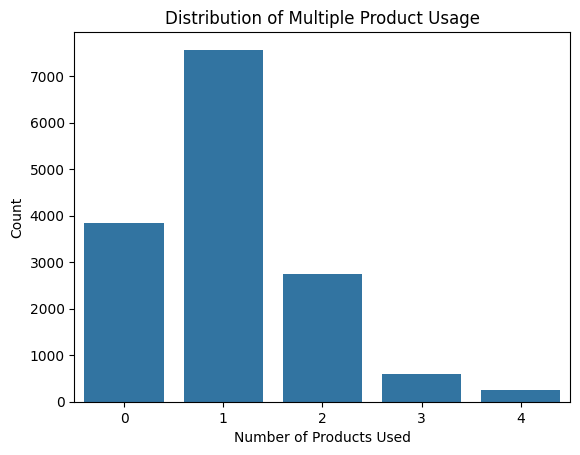

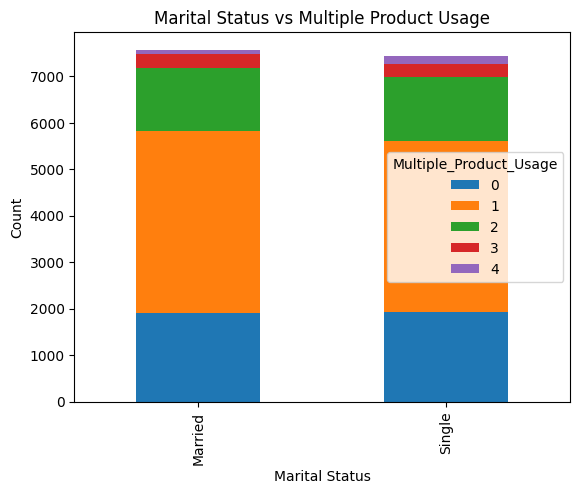

In [ ]:
product_columns = ['CDAccount', 'Securities.Account', 'CreditCard', 'Online']

# Create a new column 'Multiple_Product_Usage' by summing up binary indicators for product usage
df['Multiple_Product_Usage'] = df[product_columns].sum(axis=1)
# Inspect the new column
print(df[['CDAccount', 'Securities.Account', 'CreditCard', 'Online', 'Multiple_Product_Usage']].head())

sns.countplot(x='Multiple_Product_Usage', data=df)
plt.title('Distribution of Multiple Product Usage')
plt.xlabel('Number of Products Used')
plt.ylabel('Count')
plt.show()

pd.crosstab(df['Marital_Status'], df['Multiple_Product_Usage']).plot(kind='bar', stacked=True)
plt.title('Marital Status vs Multiple Product Usage')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

<ipython-input-41-78c96683dc35>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age_Group'] = pd.cut(df1['Age'], bins=bins, labels=labels, right=False)


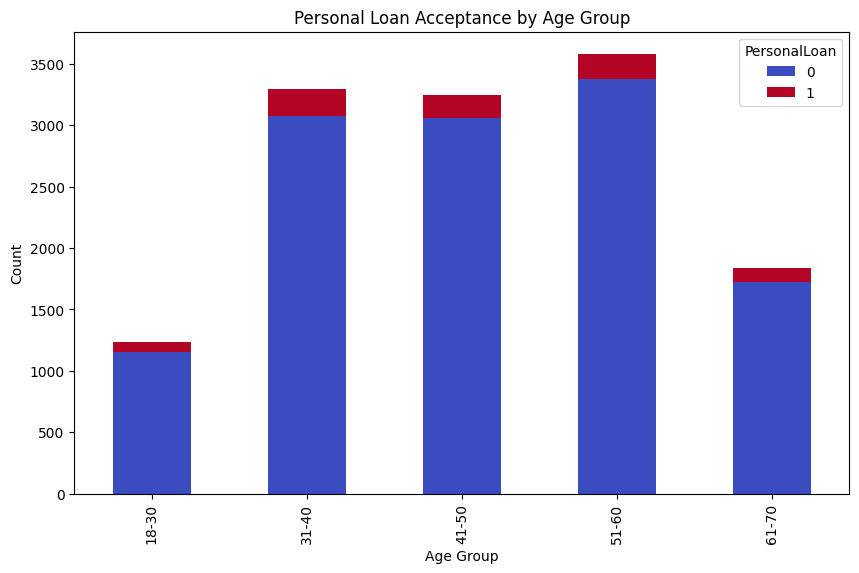

In [ ]:
# Creating Age Bins (e.g., 18-30, 31-40, etc.)
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70']
df1['Age_Group'] = pd.cut(df1['Age'], bins=bins, labels=labels, right=False)

# Cross-tabulation of Age Groups and Personal Loan
loan_by_age_group = pd.crosstab(df1['Age_Group'], df1['PersonalLoan'])

# Plotting the distribution of personal loan acceptance by age group
loan_by_age_group.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='coolwarm')
plt.title('Personal Loan Acceptance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for numerical features
X = df[numerical_columns]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

# Remove features with high VIF
high_vif_features = vif[vif['VIF'] > 10]['Features']
X_reduced = X.drop(columns=high_vif_features)

# Recalculate VIF after removing high VIF features
vif_reduced = pd.DataFrame()
vif_reduced['Features'] = X_reduced.columns
vif_reduced['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]
print(vif_reduced)

      Features        VIF
0          Age  53.791097
1   Experience  24.179262
2       Income   6.316142
3       Family   5.499068
4        CCAvg   3.836494
5     Mortgage   1.369881
6  Loan_Amount   4.120326
      Features       VIF
0       Income  5.417838
1       Family  3.070792
2        CCAvg  3.826584
3     Mortgage  1.362588
4  Loan_Amount  3.085786
